# 클러스터링

## 1) 개요

In [ ]:
# 유클리드거리 - 직선거리 - 주요 사용됨
# 맨해튼거리  - 더하기만해도돼서 연산 비용이 적음, 정확도 떨어짐

# 군집화 방법
# 계측적 군집화 방법
# 비계층적 군집화 방법

In [ ]:
# C. K-means 군집화의 실행단계

# 1) 나누고자 하는 클러스터의 개수를 설정, 그 갯수만큼 임의의 초기점 생성
# 2) initial point를 군집중심점으로 생각하고 군집 구분 실시
# 3) 군집별로 새로운 군집중심점을 계산
# 4) 새로운 군집중심점을 기준으로 군집 구분 실시
# 5) 3-4번 과정을 반복 (더 이상 군집 구분의 변화가 없을 때까지)

# ① 다음과 같이 X, Y로 분포되어 있는 데이터들을 유사한 3개의 집단으로 군집화
# ② 우선 임의로 3개의 군집 중심점(임시)을 설정
# ③ 임시로 설정된 세 좌표를 기준으로 군집화 수행
# ④ 각 군집별 중심점을 계산하여, 새로운 중심점 설정
# ⑤ 새로운 중심점을 기준으로 군집화 수행  일부 좌표의 소속 군집 변화
# ⑥ 다시 새로운 군집 중심점 설정 (이후 앞의 내용을 계속해서 반복)


In [ ]:
# D. K-means clustering 방법의 장/단점

# 1) 장점
# 적용이 쉽고 간단하다

# 2) 단점
# 군집의 개수 K는 사전에 설정하여야 한다
# 군집 설정에 Outlier(극단좌표)의 영향이 크게 작용한다

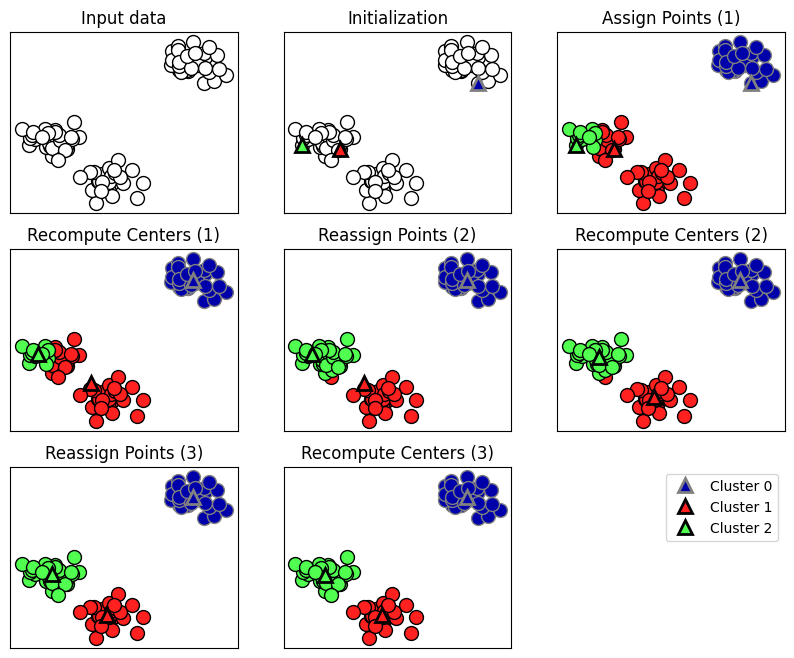

In [1]:
# kmeans 알고리즘에 대한 설명
import mglearn
mglearn.plots.plot_kmeans_algorithm()

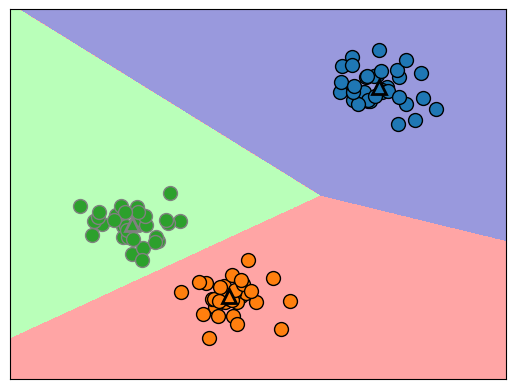

In [2]:
# kmeans 경계 표시
import matplotlib.pyplot as plt
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

#2개의 클러스터로 구분
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#모형이 분류한 라벨
print(kmeans.labels_)

#새로운 값에 대한 분류
X_new=np.array([[0, 0], [12, 3]])
print(kmeans.predict(X_new))

#중심좌표
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


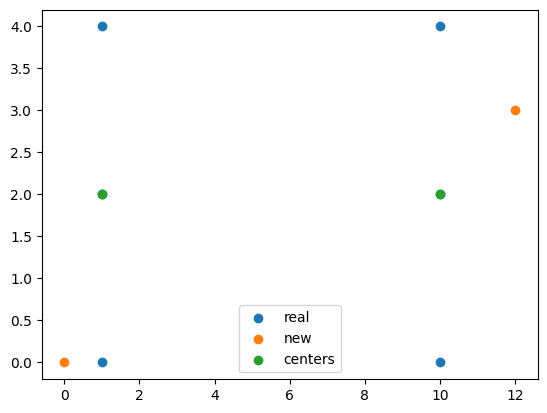

In [4]:
plt.scatter(X[:,0],X[:,1],label='real')
plt.scatter(X_new[:,0], X_new[:,1] ,label='new')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers')
plt.legend()
plt.show()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)

# 군집 모형 생성
model = KMeans(n_clusters=3)
model.fit(X)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [6]:
# 모형이 분류한 값
lbl=model.labels_
lbl

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [7]:
#예측한 값
pred = model.predict(X)
print(pred)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [8]:
# 모델의 정확도
# 클러스터링에는 정확도 계산이 의미가 없음
import sklearn.metrics as sm
sm.accuracy_score(y, pred)

# 실루엣스코어 : 클러스터링 평가 기준

0.0

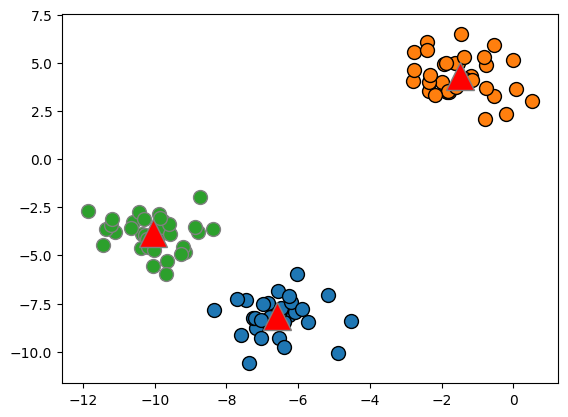

In [9]:
#3개의 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')

#centers
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', c='r', s=20)

plt.show()

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

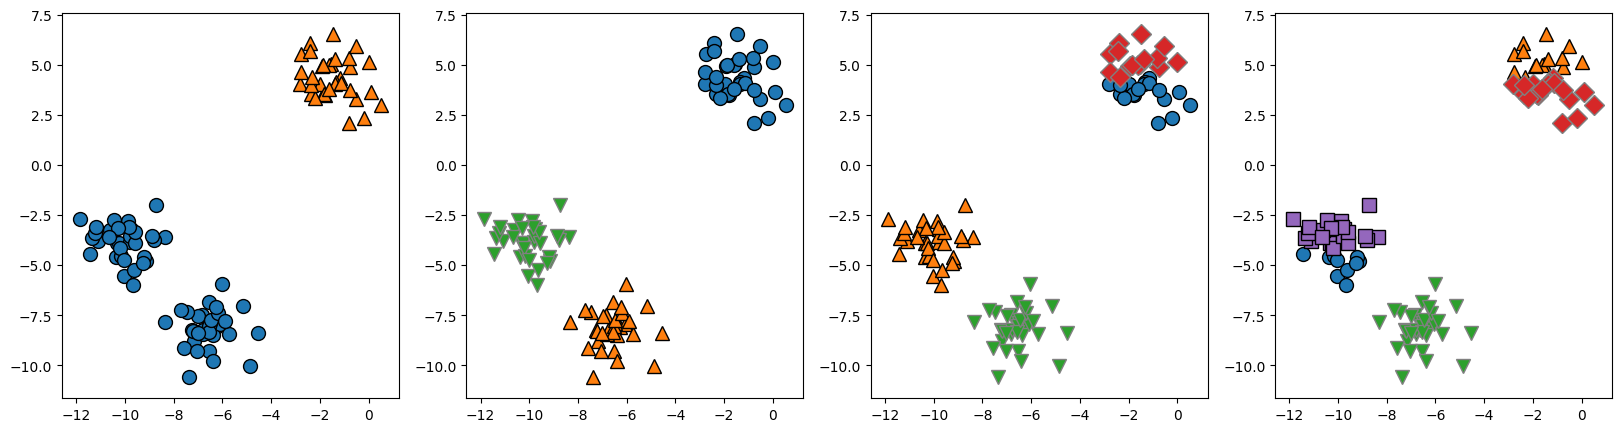

In [10]:
from matplotlib import pyplot as plt

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax=axes[idx])
    idx+=1

plt.show()

## 2) 오존량 예측

In [1]:
import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("./data/ozone/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


In [2]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]
y = df['Result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

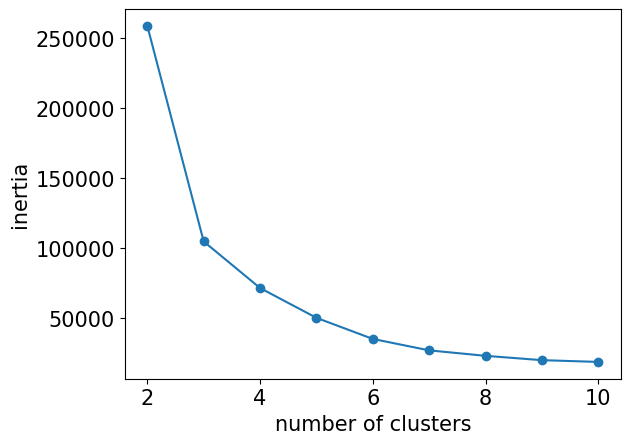

In [3]:
#최적의 클러스터 갯수를 구하는 방법
#inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값
#작을수록 응집도가 높은 군집

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = range(2, 11)
inertias = []

for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n,random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_) 

plt.rcParams["font.size"]=15
plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")
plt.show()

#엘보우(elbow) 기법
#inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분 3
#따라서 3개의 클러스터로 분류하는 것이 적절함

In [4]:
# 클러스터수 3개
model = KMeans(n_clusters=3,random_state=10)
print(model)

pred=model.fit_predict(X_train)
print(pred[:5])

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[2 0 1 0 2]
[1 1 2 1 0]


c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
# 군집화에서는 개별 라벨값보다는 군집이 중요함
# 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄
# ai : i와 같은 군집에 속한 원소들의 평균 거리
# bi : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
# (bi - ai) / max(ai,bi)
# 실루엣계수가 클수록 좋은 모형
# 군집의 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려운 단점이 있음
# 숫자가 1.0에 가까울수록 군집화가 잘 되었다고 볼 수 있음

from sklearn.metrics import silhouette_score
silhouette_score(X_test, pred)

0.362807087165505

In [6]:
#클러스터 갯수를 2로 설정
model = KMeans(n_clusters=2,random_state=10)
print(model)

pred=model.fit_predict(X_train)
print(pred[:5])

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 0 1 0 0]
[1 1 1 1 0]


c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
silhouette_score(X_test, pred)

0.6828285281281741

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

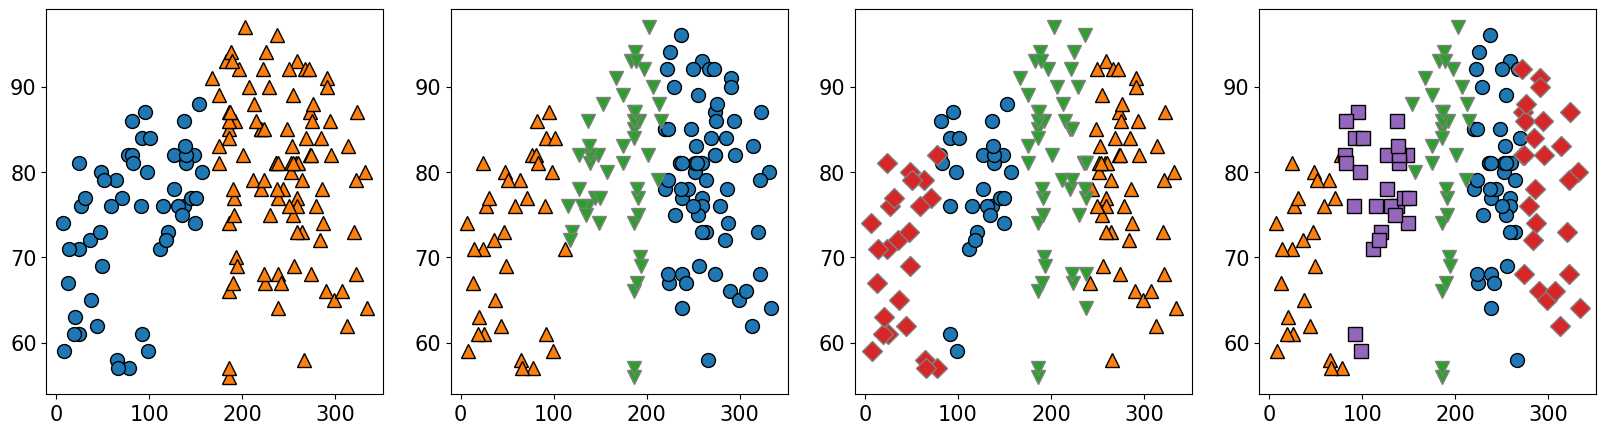

In [8]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls, ax=axes[idx])
    idx+=1

In [9]:
# KMeans 단점
# 도넛모양 두개 안과 밖인경우 안과 밖이아닌 위아래로 나뉨
# ^v 가 겹쳐있는 경우도 ^ v 가아닌 왼쪽 오른쪽으로만 나뉨

## 3) 붓꽃 품종 분류

In [10]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
import pandas as pd

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

df=pd.concat([X,y],axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


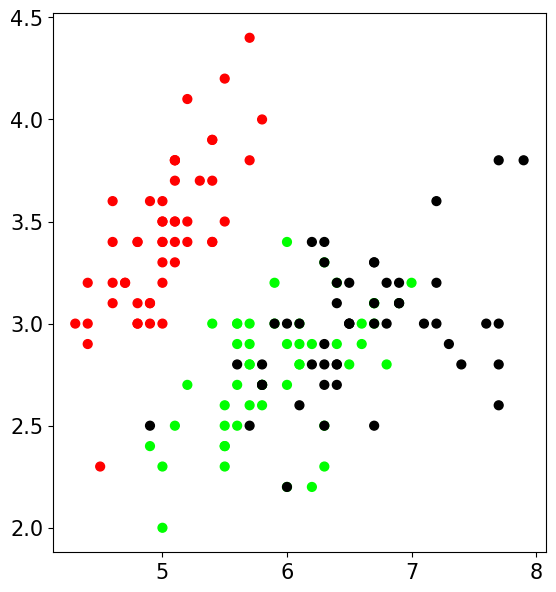

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 사이즈
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 꽃받침 기준 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.Targets], s=40)

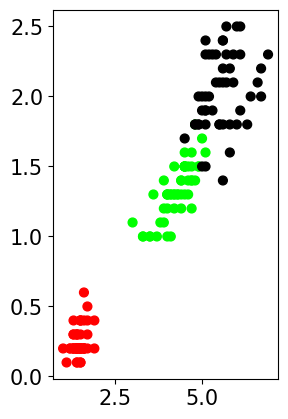

In [13]:
# 꽃잎 기준 그래프
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

In [14]:
# KMeans Cluster 모델 생성(클러스터 3개)
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=0)
model.fit(X)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [15]:
# clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

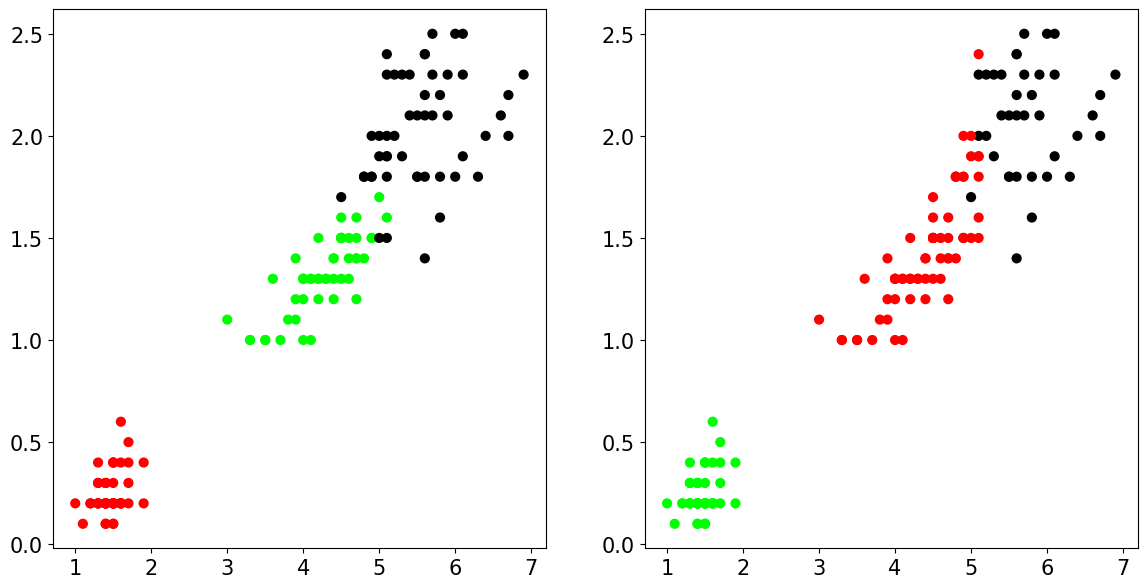

In [16]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)

# clustering은 비교적 잘 되었으나 색상이 다름(label이 다르게 매겨짐)
# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

In [17]:
# label 순번 변경
# [0,1,2]에서 [1,0,2]로 변경 ( 0과 1을 서로 바꿈 )
pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


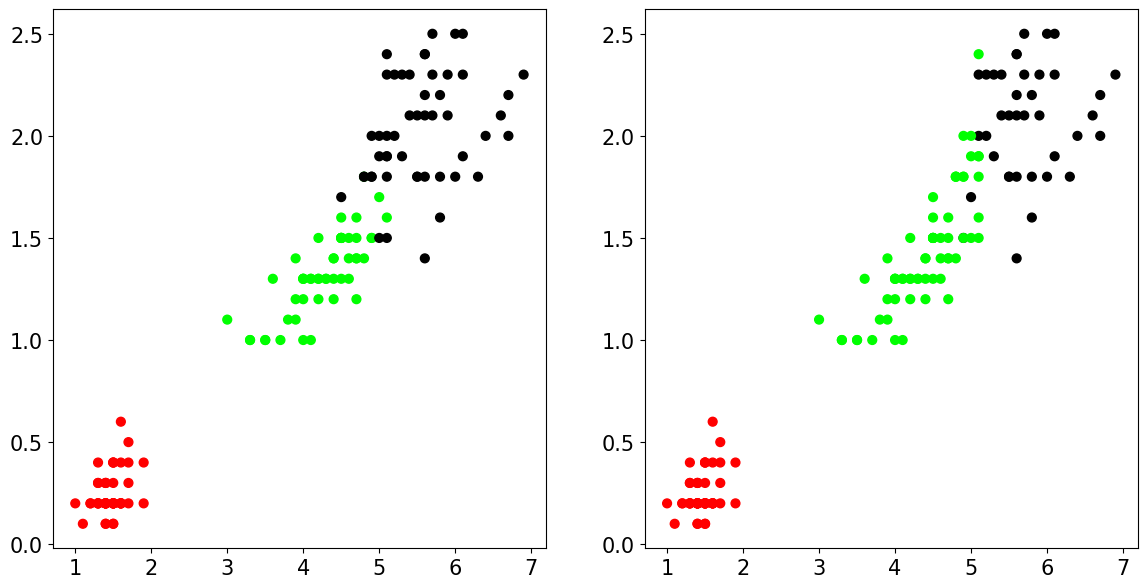

In [18]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

# 그래프 출력(예측)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred], s=40)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

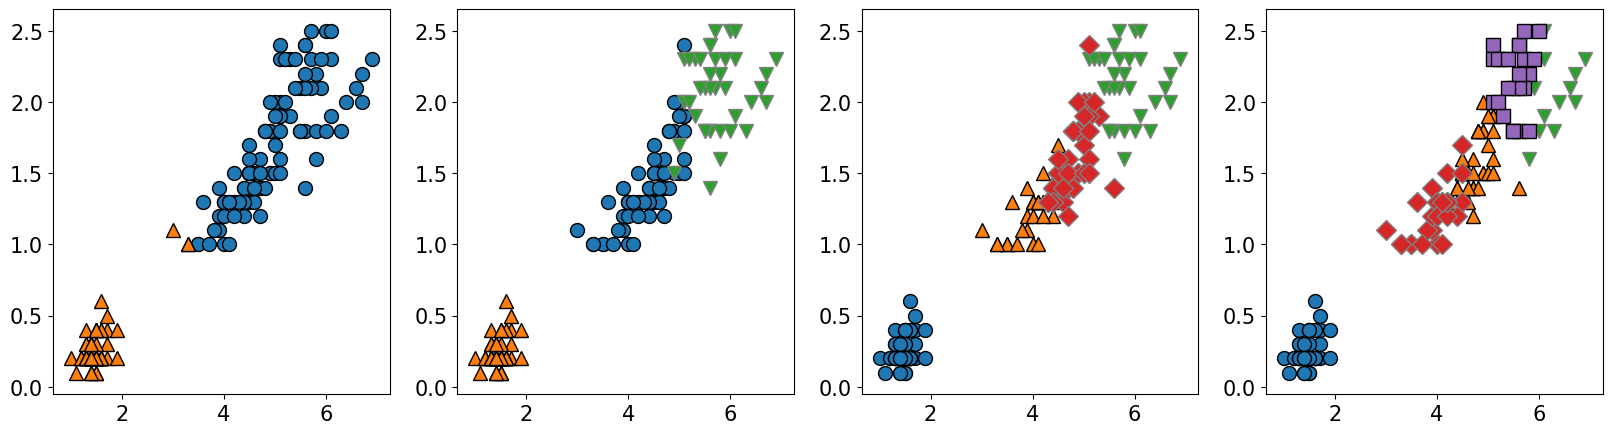

In [19]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Petal_Length"], X["Petal_Width"], lbls, ax=axes[idx])
    idx+=1

In [ ]:
# 오라클 설치 (oracle.com)
# oracle express edition download
# oracle sql developer
# Windows 64-bit with JDK 11 included

# Django 실습(oracle 연동)

# 클러스터링 (python, R)
# 시계열분석 (python, R)

# arima
# RNN
